In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pickle

from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from tabulate import tabulate

In [4]:
with open('features.txt', 'r') as f:
    features = f.read().replace(" ", "").splitlines()

with open('y_train.txt', 'r') as f:
    y_train = f.read().splitlines()

with open('y_test.txt', 'r') as f:
    y_test = f.read().splitlines()

with open('subject_id_train.txt', 'r') as f:
    subject_id_train = f.read().splitlines()

with open('subject_id_test.txt', 'r') as f:
    subject_id_test = f.read().splitlines()
    
labels = []
with open('activity_labels.txt', 'r') as f:
    for line in f:
        line = line.split()
        labels.append(line[1])

#Cohérence des labels pour les numéros d'activité
for i in range(len(y_train)):
    y_train[i] = labels[int(y_train[i])-1]
for i in range(len(y_test)):
    y_test[i] = labels[int(y_test[i])-1]

x_train = pd.read_csv('X_train.txt', sep=" ", header=None)
x_train.columns = features
x_train['subject-id'] = subject_id_train

x_test = pd.read_csv('X_test.txt', sep=" ", header=None)
x_test.columns = features
x_test['subject-id'] = subject_id_test

In [5]:
x_train

,tBodyAcc-Mean-1,tBodyAcc-Mean-2,tBodyAcc-Mean-3,tBodyAcc-STD-1,tBodyAcc-STD-2,tBodyAcc-STD-3,tBodyAcc-Mad-1,tBodyAcc-Mad-2,tBodyAcc-Mad-3,tBodyAcc-Max-1,...,fBodyGyroJerkMag-Skewness-1,fBodyGyroJerkMag-Kurtosis-1,tBodyAcc-AngleWRTGravity-1,tBodyAccJerk-AngleWRTGravity-1,tBodyGyro-AngleWRTGravity-1,tBodyGyroJerk-AngleWRTGravity-1,tXAxisAcc-AngleWRTGravity-1,tYAxisAcc-AngleWRTGravity-1,tZAxisAcc-AngleWRTGravity-1,subject-id
0,0.043580,-0.005970,-0.035054,-0.995381,-0.988366,-0.937382,-0.995007,-0.988816,-0.953325,-0.794796,...,-0.314848,-0.713308,-0.112754,0.030400,-0.464761,-0.018446,-0.841559,0.179913,-0.051718,1
1,0.039480,-0.002131,-0.029067,-0.998348,-0.982945,-0.971273,-0.998702,-0.983315,-0.974000,-0.802537,...,-0.603199,-0.860677,0.053477,-0.007435,-0.732626,0.703511,-0.845092,0.180261,-0.047436,1
2,0.039978,-0.005153,-0.022651,-0.995482,-0.977314,-0.984760,-0.996415,-0.975835,-0.985973,-0.798477,...,-0.404427,-0.761847,-0.118559,0.177899,0.100699,0.808529,-0.849230,0.180610,-0.042271,1
3,0.039785,-0.011809,-0.028916,-0.996194,-0.988569,-0.993256,-0.996994,-0.988526,-0.993135,-0.798477,...,-0.138373,-0.491604,-0.036788,-0.012892,0.640011,-0.485366,-0.848947,0.181907,-0.040826,1
4,0.038758,-0.002289,-0.023863,-0.998241,-0.986774,-0.993115,-0.998216,-0.986479,-0.993825,-0.801982,...,-0.366214,-0.702490,0.123320,0.122542,0.693578,-0.615971,-0.848164,0.185124,-0.037080,1
5,0.038988,0.004109,-0.017340,-0.997438,-0.993485,-0.996692,-0.997522,-0.993494,-0.996916,-0.801982,...,-0.554902,-0.844224,0.082632,-0.143439,0.275041,-0.368224,-0.849927,0.184795,-0.035326,1
6,0.039897,-0.005324,-0.020457,-0.997024,-0.977313,-0.987782,-0.996898,-0.977450,-0.989391,-0.800606,...,-0.235576,-0.571126,-0.212754,-0.230622,0.014637,-0.189512,-0.852441,0.182142,-0.036203,1
7,0.039082,-0.016047,-0.030241,-0.996662,-0.976996,-0.986672,-0.996380,-0.977594,-0.989310,-0.800606,...,-0.104337,-0.432022,-0.020888,0.593996,-0.561871,0.467383,-0.851309,0.183751,-0.035176,1
8,0.039026,-0.007410,-0.027301,-0.997431,-0.973190,-0.988183,-0.997491,-0.971557,-0.990156,-0.800245,...,-0.286366,-0.579474,0.012954,0.080936,-0.234313,0.117797,-0.848270,0.188955,-0.030594,1
9,0.040354,0.004245,-0.017932,-0.994906,-0.981181,-0.990046,-0.995300,-0.982483,-0.990920,-0.799717,...,0.306076,0.115919,-0.020590,-0.127730,-0.482871,-0.070670,-0.848592,0.190283,-0.027667,1


## Visualisation des données

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a242deda0>,
      dtype=object)

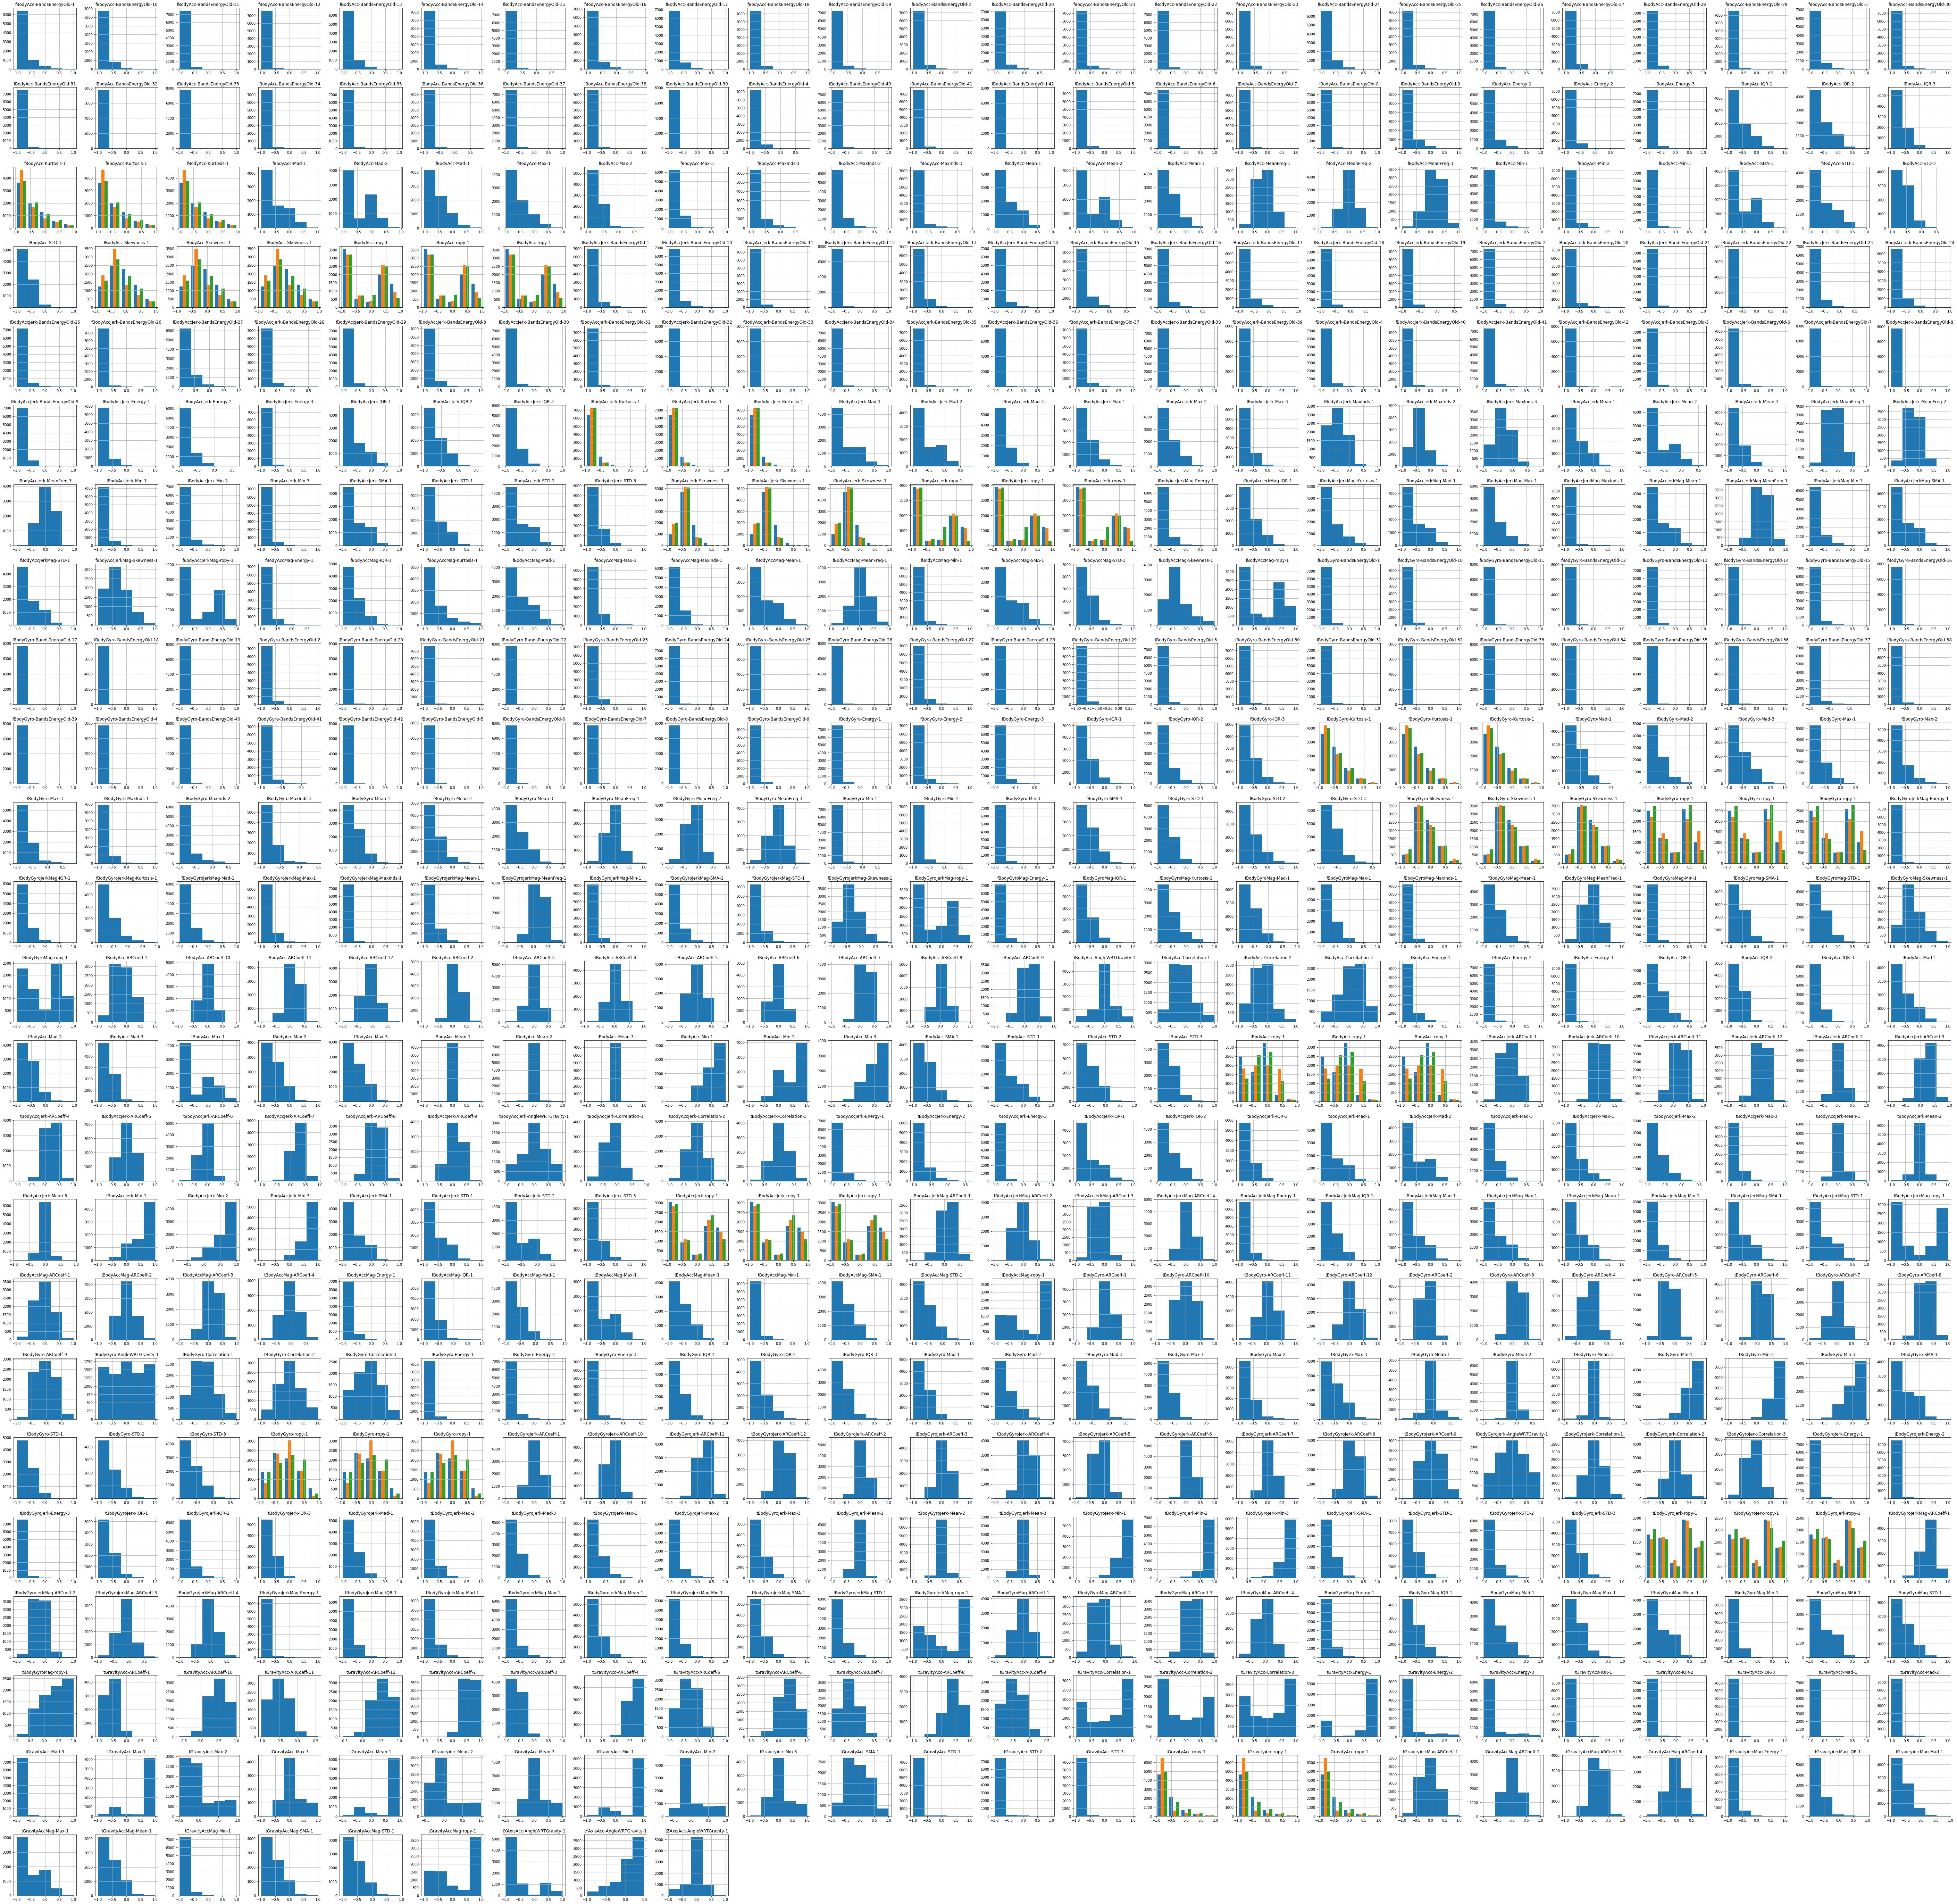

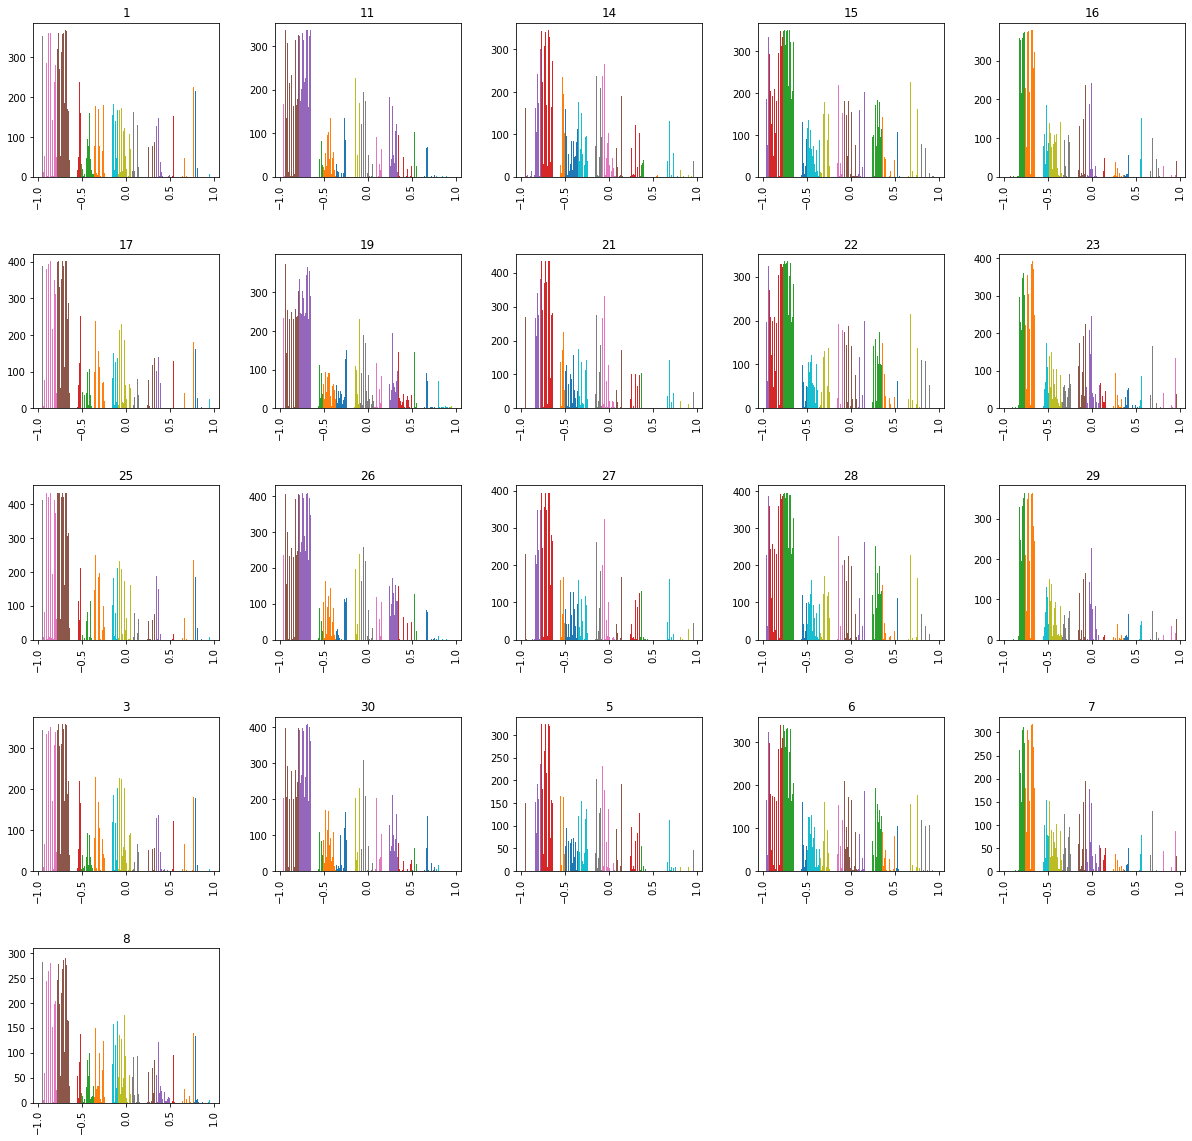

In [6]:
x_train.hist(bins=5, figsize=(100, 100))

#GroupBy 'subject-id'
x_train.hist(bins=5, by='subject-id', figsize=(20, 20))

## Entraînement (LogisticRegression, SVM, RandomForestClassifier, MLPClassifier)

### LogisticRegression(max_iter=10000)

In [53]:
LR1 = LogisticRegression(max_iter=10000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
res1 = LR1.predict(x_test)

#Calcul du score du modèle
print(LR1.score(x_test, y_test))

0.9449715370018975


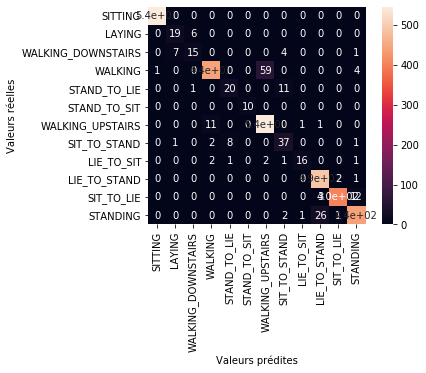

In [54]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res1), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [52]:
#Feature importance
feature_importance = abs(LR1.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                      Score
tGravityAcc-Energy-1             100
tGravityAcc-Min-1                 91.7692
tGravityAcc-Mean-1                91.5446
tGravityAcc-Max-1                 87.4492
tXAxisAcc-AngleWRTGravity-1       77.6949
tGravityAcc-Energy-2              66.9076
tGravityAcc-SMA-1                 48.691
tBodyAcc-ropy-1                   37.2591
tBodyAcc-Correlation-1            34.9241
tGravityAcc-Energy-3              34.754
tBodyAcc-ropy-1                   31.3153
tBodyGyroJerk-ropy-1              28.8782
tBodyGyro-Correlation-1           27.8511
fBodyGyro-Kurtosis-1              26.3301
tBodyAccJerk-Correlation-3        26.0314
tBodyAcc-Max-1                    25.5184
fBodyGyro-Skewness-1              24.3101
tBodyGyroJerk-ARCoeff-1           23.5092
tGravityAcc-Max-2                 23.454
tYAxisAcc-AngleWRTGravity-1       23.4351
tBodyGyroJerk-ARCoeff-3           22.6669
tBodyAcc-Correlation-3            21.9435
tGravityAcc-Mean-2                21.

### LogisticRegression(max_iter=100000)

In [59]:
LR2 = LogisticRegression(max_iter=100000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
res2 = LR2.predict(x_test)

#Calcul du score du modèle
print(LR2.score(x_test, y_test))

0.9449715370018975


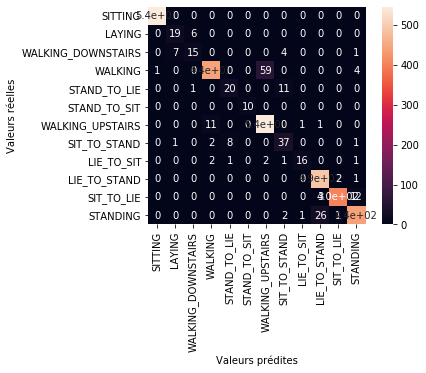

In [60]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res2), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [61]:
#Feature importance
feature_importance = abs(LR2.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                      Score
tGravityAcc-Energy-1             100
tGravityAcc-Min-1                 91.7692
tGravityAcc-Mean-1                91.5446
tGravityAcc-Max-1                 87.4492
tXAxisAcc-AngleWRTGravity-1       77.6949
tGravityAcc-Energy-2              66.9076
tGravityAcc-SMA-1                 48.691
tBodyAcc-ropy-1                   37.2591
tBodyAcc-Correlation-1            34.9241
tGravityAcc-Energy-3              34.754
tBodyAcc-ropy-1                   31.3153
tBodyGyroJerk-ropy-1              28.8782
tBodyGyro-Correlation-1           27.8511
fBodyGyro-Kurtosis-1              26.3301
tBodyAccJerk-Correlation-3        26.0314
tBodyAcc-Max-1                    25.5184
fBodyGyro-Skewness-1              24.3101
tBodyGyroJerk-ARCoeff-1           23.5092
tGravityAcc-Max-2                 23.454
tYAxisAcc-AngleWRTGravity-1       23.4351
tBodyGyroJerk-ARCoeff-3           22.6669
tBodyAcc-Correlation-3            21.9435
tGravityAcc-Mean-2                21.

### LogisticRegression(max_iter=500000)

In [56]:
LR = LogisticRegression(max_iter=500000, random_state=0, solver='lbfgs', multi_class='multinomial').fit(x_train, y_train)
res = LR.predict(x_test)

#Calcul du score du modèle
print(LR.score(x_test, y_test))

0.9449715370018975


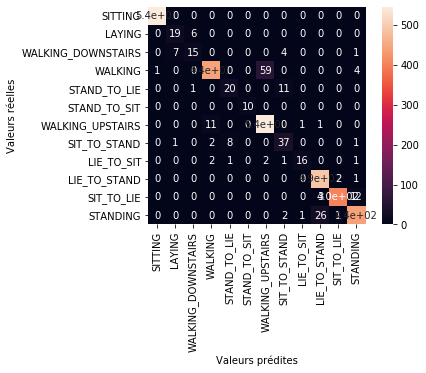

In [14]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [15]:
#Feature importance
feature_importance = abs(LR.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                      Score
tGravityAcc-Energy-1             100
tGravityAcc-Min-1                 91.7692
tGravityAcc-Mean-1                91.5446
tGravityAcc-Max-1                 87.4492
tXAxisAcc-AngleWRTGravity-1       77.6949
tGravityAcc-Energy-2              66.9076
tGravityAcc-SMA-1                 48.691
tBodyAcc-ropy-1                   37.2591
tBodyAcc-Correlation-1            34.9241
tGravityAcc-Energy-3              34.754
tBodyAcc-ropy-1                   31.3153
tBodyGyroJerk-ropy-1              28.8782
tBodyGyro-Correlation-1           27.8511
fBodyGyro-Kurtosis-1              26.3301
tBodyAccJerk-Correlation-3        26.0314
tBodyAcc-Max-1                    25.5184
fBodyGyro-Skewness-1              24.3101
tBodyGyroJerk-ARCoeff-1           23.5092
tGravityAcc-Max-2                 23.454
tYAxisAcc-AngleWRTGravity-1       23.4351
tBodyGyroJerk-ARCoeff-3           22.6669
tBodyAcc-Correlation-3            21.9435
tGravityAcc-Mean-2                21.

### SVM

In [16]:
SVM = svm.SVC(decision_function_shape="ovo", kernel='linear').fit(x_train, y_train)
res = SVM.predict(x_test)

#Calcul du score du modèle
print(SVM.score(x_test, y_test))

0.9490828589500316


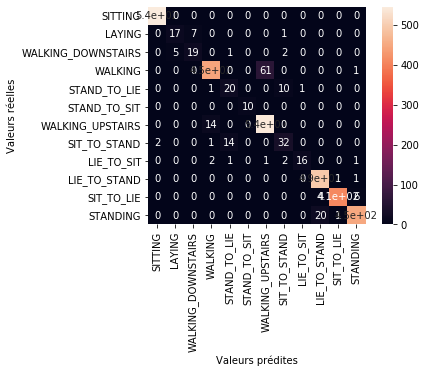

In [17]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [18]:
#Feature importance
feature_importance = abs(SVM.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, feature_importance), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                     Score
tBodyAcc-ropy-1                  100
tBodyAcc-Mean-1                   72.769
tBodyAcc-Max-1                    68.7104
tBodyAcc-Correlation-1            65.9049
tGravityAcc-ropy-1                63.6944
tBodyAcc-Min-1                    61.6964
tBodyGyro-Correlation-3           58.6004
tBodyAcc-ropy-1                   58.5969
tBodyGyroJerk-ARCoeff-12          57.7414
tBodyAcc-ropy-1                   57.2613
tBodyGyro-ARCoeff-11              54.9473
fBodyAccJerk-MaxInds-3            53.5753
tBodyGyro-ARCoeff-12              53.3338
fBodyAccJerk-MaxInds-2            46.8697
tBodyAcc-Max-2                    44.5039
tGravityAcc-Max-1                 42.1075
tGravityAcc-Mean-1                41.2159
fBodyGyro-Kurtosis-1              39.914
fBodyGyro-Skewness-1              37.8727
tGravityAcc-SMA-1                 37.107
tBodyAccJerk-ARCoeff-4            35.4931
tBodyAcc-Min-2                    34.4789
tBodyAccJerk-ARCoeff-8            34.0

###  Random Forest (n_estimators = 1000, max_depth = 10)

In [23]:
RF = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0).fit(x_train, y_train)
res = RF.predict(x_test)

#Calcul du score du modèle
print(RF.score(x_test, y_test))

0.9070208728652751


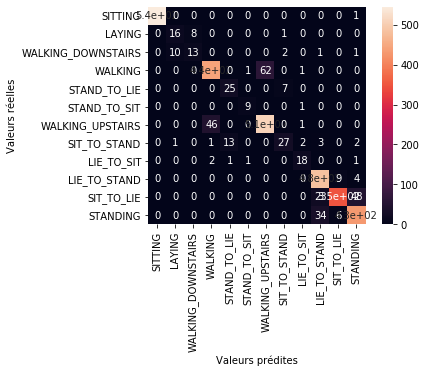

In [24]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [25]:
#Feature importance
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, RF.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                    Score
tGravityAcc-Min-1                0.031057
tYAxisAcc-AngleWRTGravity-1      0.0269424
tGravityAcc-Mean-2               0.0264372
tGravityAcc-Max-1                0.0256513
tXAxisAcc-AngleWRTGravity-1      0.025403
tGravityAcc-Mean-1               0.0252161
tGravityAcc-Max-2                0.0241989
tGravityAcc-Min-2                0.0241015
tGravityAcc-Energy-1             0.0239798
tGravityAcc-Energy-2             0.0160359
tGravityAcc-Min-3                0.010419
tGravityAcc-Mean-3               0.00978436
tGravityAcc-Max-3                0.00977395
fBodyAccJerk-BandsEnergyOld-1    0.00918769
tZAxisAcc-AngleWRTGravity-1      0.00874473
tBodyAcc-Max-1                   0.00853081
tGravityAcc-ropy-1               0.0084534
tGravityAcc-ARCoeff-5            0.00836803
fBodyAcc-BandsEnergyOld-9        0.0081982
fBodyAcc-Mad-1                   0.00789776
tBodyAccMag-STD-1                0.0077961
fBodyAccMag-Energy-1             0.00779478
tGra

###  Random Forest (n_estimators = 5000, max_depth = 10)

In [28]:
RF1 = RandomForestClassifier(n_estimators=5000, max_depth=10, random_state=0).fit(x_train, y_train)
res1 = RF1.predict(x_test)

#Calcul du score du modèle
print(RF1.score(x_test, y_test))

0.9079696394686907


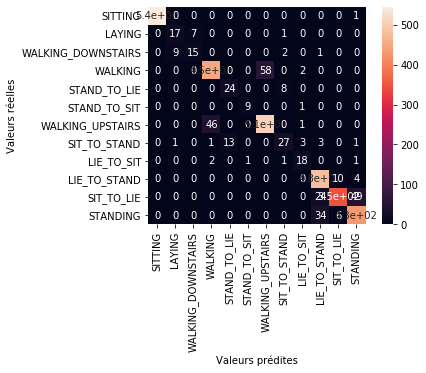

In [29]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res1), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [30]:
#Feature importance
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, RF1.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                    Score
tGravityAcc-Mean-1               0.0275615
tXAxisAcc-AngleWRTGravity-1      0.027417
tGravityAcc-Min-1                0.0273484
tGravityAcc-Energy-1             0.0265688
tGravityAcc-Mean-2               0.0260204
tGravityAcc-Max-2                0.025942
tYAxisAcc-AngleWRTGravity-1      0.025822
tGravityAcc-Max-1                0.0254337
tGravityAcc-Min-2                0.0242393
tGravityAcc-Energy-2             0.0154833
tGravityAcc-Mean-3               0.0100434
tZAxisAcc-AngleWRTGravity-1      0.00986847
tGravityAcc-Max-3                0.00981065
tGravityAcc-Min-3                0.00904075
fBodyAccJerk-BandsEnergyOld-1    0.00879334
tBodyAcc-Max-1                   0.00846634
tGravityAcc-ARCoeff-9            0.0080297
tGravityAcc-ropy-1               0.00780401
tGravityAcc-ARCoeff-10           0.0077504
tGravityAccMag-STD-1             0.00766058
tGravityAcc-ARCoeff-5            0.00761399
fBodyAcc-Mad-1                   0.00756373
tGr

###  Random Forest (n_estimators = 1000, max_depth = 20)

In [31]:
RF2 = RandomForestClassifier(n_estimators=1000, max_depth=20, random_state=0).fit(x_train, y_train)
res2 = RF2.predict(x_test)

#Calcul du score du modèle
print(RF2.score(x_test, y_test))

0.9108159392789373


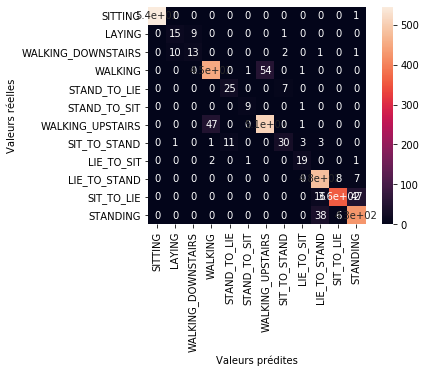

In [32]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res2), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [33]:
#Feature importance
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, RF2.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                    Score
tGravityAcc-Min-1                0.0284532
tYAxisAcc-AngleWRTGravity-1      0.025594
tXAxisAcc-AngleWRTGravity-1      0.0254784
tGravityAcc-Mean-2               0.0248302
tGravityAcc-Max-1                0.0245644
tGravityAcc-Mean-1               0.0243018
tGravityAcc-Max-2                0.0241171
tGravityAcc-Min-2                0.023953
tGravityAcc-Energy-1             0.0234913
tGravityAcc-Energy-2             0.0146171
tGravityAcc-Min-3                0.00997996
tGravityAcc-Max-3                0.00940206
tGravityAcc-Mean-3               0.00920157
tZAxisAcc-AngleWRTGravity-1      0.00915293
tBodyAcc-Max-1                   0.0086555
fBodyAccJerk-BandsEnergyOld-1    0.00829933
fBodyAccMag-Energy-1             0.00829211
tGravityAcc-ARCoeff-10           0.00799637
tGravityAcc-ropy-1               0.00793086
tGravityAcc-ARCoeff-5            0.00787381
tGravityAcc-Energy-3             0.00784668
tBodyAccMag-STD-1                0.00763865


###  Random Forest (n_estimators = 5000, max_depth = 20)

In [34]:
RF3 = RandomForestClassifier(n_estimators=5000, max_depth=20, random_state=0).fit(x_train, y_train)
res3 = RF3.predict(x_test)

#Calcul du score du modèle
print(RF3.score(x_test, y_test))

0.9092346616065781


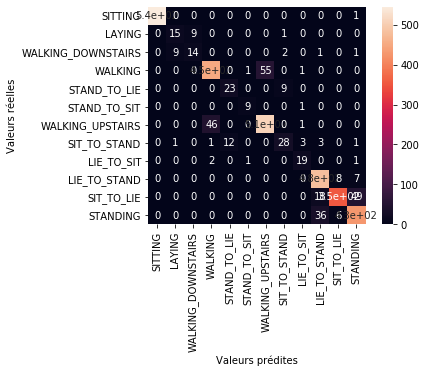

In [35]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res3), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

In [36]:
#Feature importance
headers = ["Nom", "Score"]
values = sorted(zip(x_train.columns, RF3.feature_importances_), key=lambda x: x[1] * -1)
print(tabulate(values, headers, tablefmt="plain"))

Nom                                    Score
tGravityAcc-Mean-1               0.0265887
tXAxisAcc-AngleWRTGravity-1      0.0262992
tGravityAcc-Mean-2               0.0254828
tGravityAcc-Min-1                0.0254817
tGravityAcc-Energy-1             0.0254054
tYAxisAcc-AngleWRTGravity-1      0.0253725
tGravityAcc-Max-2                0.0248404
tGravityAcc-Max-1                0.0243816
tGravityAcc-Min-2                0.0238211
tGravityAcc-Energy-2             0.0148956
tGravityAcc-Mean-3               0.00969812
tZAxisAcc-AngleWRTGravity-1      0.00965449
tGravityAcc-Max-3                0.00936706
tGravityAcc-Min-3                0.00900126
tBodyAcc-Max-1                   0.00846823
fBodyAccJerk-BandsEnergyOld-1    0.0082044
tGravityAcc-ARCoeff-5            0.00766827
tGravityAcc-ARCoeff-10           0.00761077
tGravityAcc-ropy-1               0.00745117
tGravityAcc-ARCoeff-9            0.00736646
tGravityAcc-Energy-3             0.00735646
fBodyAccMag-Mad-1                0.0072344

### MLP (max_iter=1200)

In [37]:
MLP = MLPClassifier(max_iter=1200, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
res = MLP.predict(x_test)

#Calcul du score du modèle
print(MLP.score(x_test, y_test))

0.9320050600885516


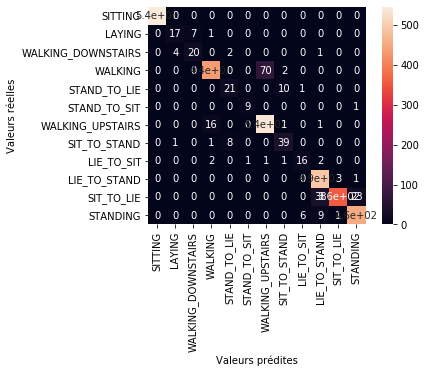

In [38]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### MLP (max_iter=2000)

In [39]:
MLP1 = MLPClassifier(max_iter=2000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
res1 = MLP1.predict(x_test)

#Calcul du score du modèle
print(MLP1.score(x_test, y_test))

0.9320050600885516


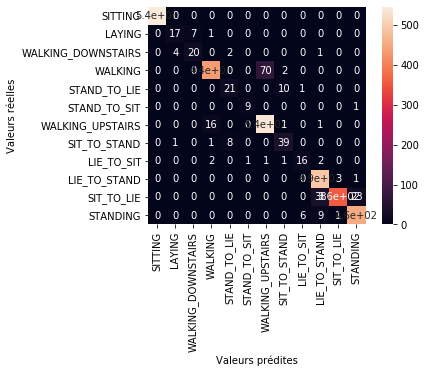

In [40]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res1), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### MLP (max_iter=10000)

In [44]:
MLP2 = MLPClassifier(max_iter=10000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(150, 10), random_state=1).fit(x_train, y_train)
res2 = MLP2.predict(x_test)

#Calcul du score du modèle
print(MLP2.score(x_test, y_test))

0.9320050600885516


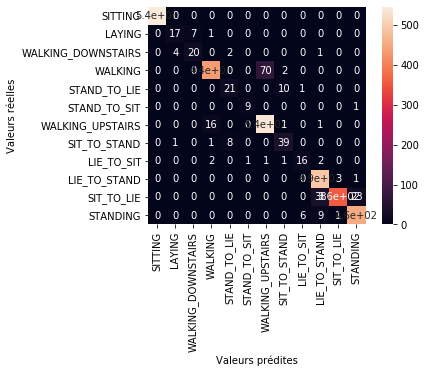

In [43]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res2), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### MLP (max_iter=1000, hidden_layer_sizes=250,10)

In [48]:
MLP4 = MLPClassifier(max_iter=1000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(250, 10), random_state=1).fit(x_train, y_train)
res4 = MLP4.predict(x_test)

#Calcul du score du modèle
print(MLP4.score(x_test, y_test))

0.9174573055028463


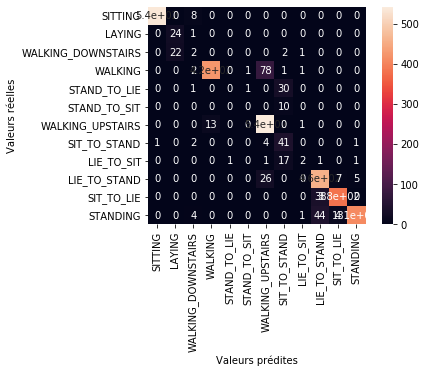

In [49]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res3), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

### MLP (max_iter=1000, hidden_layer_sizes=500,10)

In [46]:
MLP3 = MLPClassifier(max_iter=1000, solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(500, 10), random_state=1).fit(x_train, y_train)
res3 = MLP3.predict(x_test)

#Calcul du score du modèle
print(MLP3.score(x_test, y_test))

0.8924731182795699


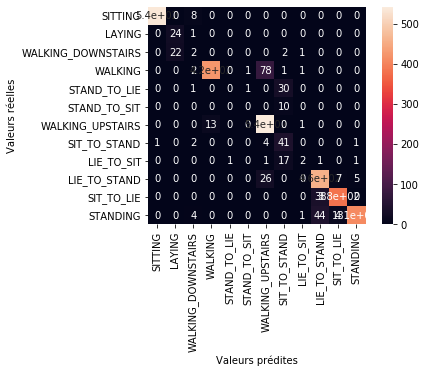

In [47]:
#Confusion Matrix
sns.heatmap(confusion_matrix(y_test, res3), square=True, annot=True, xticklabels=set(y_train), yticklabels=set(y_train))
plt.xlabel('Valeurs prédites')
plt.ylabel('Valeurs réelles');

## Meilleur modèle : SVM (meilleure précision)

In [57]:
with open('model.pkl', 'wb') as file:
    pickle.dump(SVM, file)

In [62]:
with open('model.pkl', 'rb') as file:
    pickle_model = pickle.load(file)

print(pickle_model.score(x_test, y_test))

0.9490828589500316
